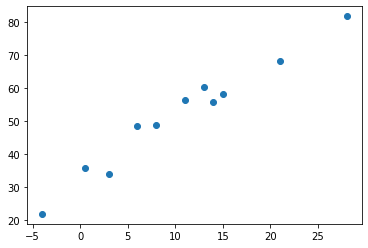

In [27]:
import torch

#magic function, plots will be visible in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

#statement of the problem:
#we want to find the correlation between temperatures t_c and t_u. To be exact, we want to find the 
#transformation (possibly linear) that is needed to convert temp. units (t_u) to t_c.

# temperature data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

plt.scatter(t_c, t_u)


In [40]:
# proceeding with the linear type of model (essentially defining linear regression from scratch)

#approach: we want to create a linear function that converts t_u to values t_p. t_p are meant
#to be the values as close to t_c as possible. w - weights, b - bias (y = w*x + b).

def model(t_u, w, b):
    return w * t_u + b

# we are applying the L2 kind of loss (MSE). More robust for outliers, penalizes very wrong results more that L1 metric.

def loss(t_p, t_c):
    loss = (t_p - t_c)**2
    return loss.mean()

#test
# test_c = torch.tensor([2], dtype = float)
# test_p = torch.tensor([1], dtype = float)

# print(loss(test_c, test_p))

# w and b initializing
w = torch.ones(())
b = torch.zeros(())

print(w.shape)
print(w.type())
print(w)
print(w.size())

# calculating t_p for earlier defined t_u

t_p = model(t_u, w, b)
loss(t_p, t_c)


torch.Size([])
torch.FloatTensor
tensor(1.)
torch.Size([])
torch.Size([])


tensor(1763.8846)

In [76]:
# BROADCASTING
# pytorch functionality that allow us to perform operations of tensors that are not necessarily of the same size/shape.

x = torch.ones(())
y = torch.ones(3,1,1,1,1)
z = torch.ones(1,3)
a = torch.ones(2,1,1)
f = torch.ones(3,2)

print(y*f)
print((y*f).shape)

print(f"Shapes of the tensors: x - {x.shape}, y - {y.shape})")
print(f"Shapes of the tensors: z - {z.shape}, a - {a.shape})")

print(y)
print(a)
print(y*a)

print(f"Shapes of the tensors: y*a - {(y*a).shape}")
print(f"Shapes of the tensors: a*z - {(a*z).shape}")
print(f"Shapes of the tensors: y*a*z - {(y*a*z).shape}")
print(y*a*z)

tensor([[[[[1., 1.],
           [1., 1.],
           [1., 1.]]]],



        [[[[1., 1.],
           [1., 1.],
           [1., 1.]]]],



        [[[[1., 1.],
           [1., 1.],
           [1., 1.]]]]])
torch.Size([3, 1, 1, 3, 2])
Shapes of the tensors: x - torch.Size([]), y - torch.Size([3, 1, 1, 1, 1]))
Shapes of the tensors: z - torch.Size([1, 3]), a - torch.Size([2, 1, 1]))
tensor([[[[[1.]]]],



        [[[[1.]]]],



        [[[[1.]]]]])
tensor([[[1.]],

        [[1.]]])
tensor([[[[[1.]],

          [[1.]]]],



        [[[[1.]],

          [[1.]]]],



        [[[[1.]],

          [[1.]]]]])
Shapes of the tensors: y*a - torch.Size([3, 1, 2, 1, 1])
Shapes of the tensors: a*z - torch.Size([2, 1, 3])
Shapes of the tensors: y*a*z - torch.Size([3, 1, 2, 1, 3])
tensor([[[[[1., 1., 1.]],

          [[1., 1., 1.]]]],



        [[[[1., 1., 1.]],

          [[1., 1., 1.]]]],



        [[[[1., 1., 1.]],

          [[1., 1., 1.]]]]])


In [83]:
# rate of change calculating

delta = 0.1
loss_rate_of_change_w = (model(t_u, w + delta, b) - model(t_u, w - delta, b))/(2*delta)
print(loss_rate_of_change_w)
print(loss_rate_of_change_w.mean())

#same calculating for the b parameter
loss_rate_of_change_b = (model(t_u, w, b + delta) - model(t_u, w, b - delta))/(2*delta)
print(loss_rate_of_change_b)
print(loss_rate_of_change_b.mean())

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
tensor(51.8000)
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000])
tensor(1.0000)


In [ ]:
#derivatives for the gradient descent

#first, derivative of the loss function (which is a quadratic function, MSE)
#remembering that t_p is the the variable here
def dloss(t_p, t_c):
    dloss = 2*(t_p - t_c)
    return dloss / t_p.size() #division necessary to address the mean calculation from the model

#second, derivative of the model function (linear)

#two variables here, w and b, so two functions
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

#calculating the whole gradient in the one function

def grad(t_u, )
